##Arboles de decisión

In [6]:
##Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [19]:
data = pd.read_csv("Cleaned-Data.csv")
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [20]:
data.shape


(316800, 27)

In [21]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([201600.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 115200.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

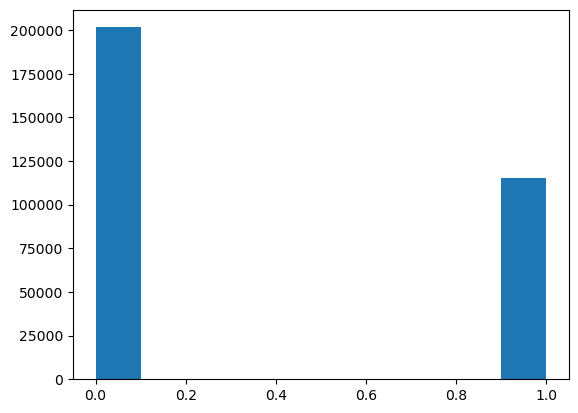

In [24]:
plt.hist(data.Diarrhea)

In [26]:
predictors_col = ["Severity_Mild", "Severity_Moderate", "Severity_None", "Severity_Severe"]
target_col = ["Diarrhea"]

In [27]:
predictors = data[predictors_col]
target = data[target_col]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 13)

In [29]:
tree = DecisionTreeClassifier()

In [30]:
arbol = tree.fit(X_train, y_train)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.463\nsamples = 253440\nvalue = [161308, 92132]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.463\nsamples = 190028\nvalue = [120999, 69029]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.462\nsamples = 126890\nvalue = [80832, 46058]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.462\nsamples = 63429\nvalue = [40420, 23009]'),
 Text(0.5, 0.125, 'gini = 0.463\nsamples = 63461\nvalue = [40412, 23049]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.463\nsamples = 63138\nvalue = [40167, 22971]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.463\nsamples = 63412\nvalue = [40309, 23103]')]

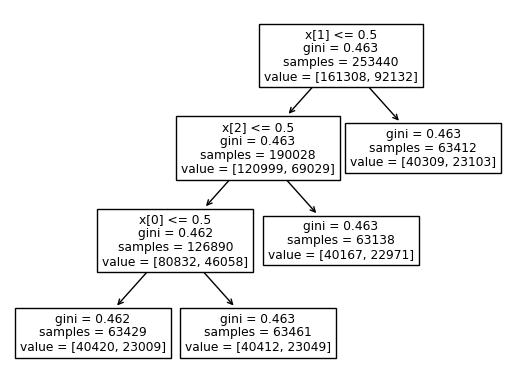

In [31]:
plot_tree(arbol)

In [32]:
predicciones = arbol.predict(X_test)

In [33]:
#Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]),predicciones, rownames=['Actual'], colnames= ['Predicciones'])

Predicciones,0
Actual,
0,40292
1,23068


In [34]:
accuracy =accuracy_score(y_test,predicciones)
accuracy

0.6359217171717172